In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split


In [4]:
directory = '/content/drive/MyDrive/狗狗品種data/datas/TRAIN'
directory2 = '/content/drive/MyDrive/狗狗品種data/datas/TEST'

In [5]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['american_pit_bull_terrier', 'american_bulldog', 'beagle', 'basset_hound', 'boxer', 'english_cocker_spaniel', 'english_setter', 'chihuahua', 'german_shorthaired', 'great_pyrenees', 'havanese', 'keeshond', 'japanese_chin', 'newfoundland', 'miniature_pinscher', 'leonberger', 'pug', 'pomeranian', 'saint_bernard', 'wheaten_terrier', 'scottish_terrier', 'shiba_inu', 'samoyed', 'staffordshire_bull_terrier', 'yorkshire_terrier']
25


In [6]:
mapping={ 'basset_hound':0, 'beagle':1, 'pomeranian':2, 
         'staffordshire_bull_terrier':3, 'keeshond':4, 'pug':5, 'shiba_inu':6, 
         'american_pit_bull_terrier':7,  'newfoundland':8, 
         'havanese':9, 'japanese_chin':10, 'german_shorthaired':11, 
         'english_cocker_spaniel':12, 'scottish_terrier':13, 'wheaten_terrier':14, 'chihuahua':15, 
         'american_bulldog':16, 'boxer':17, 'yorkshire_terrier':18, 'miniature_pinscher':19, 
         'samoyed':20, 'leonberger':21,'english_setter':22,
         'great_pyrenees':23, 'saint_bernard':24 }

In [7]:
dataset=[]
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [8]:
test=[]
testfile=[]

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    image=load_img(path, grayscale=False, color_mode='rgb', target_size=(180,180))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]
    testfile+=[file]

In [9]:
data,labels0=zip(*dataset)

In [10]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [11]:
data=np.array(data)
test=np.array(test)

In [12]:
data2=data.reshape(-1,180,180,3)
test2=test.reshape(-1,180,180,3)

In [13]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.25,random_state=44)

In [14]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2983, 180, 180, 3)
(995, 180, 180, 3)
(2983, 25)
(995, 25)


In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [17]:
pretrained_model3 = tf.keras.applications.DenseNet121(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [18]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(25, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
his = model.fit(trainx, trainy, epochs=100, validation_data=(testx, testy))

Epoch 1/100
94/94 [==============================] - 30s 135ms/step - loss: 1.2228 - accuracy: 0.6537 - val_loss: 0.5121 - val_accuracy: 0.8523
Epoch 2/100
94/94 [==============================] - 8s 83ms/step - loss: 0.3849 - accuracy: 0.8790 - val_loss: 0.4880 - val_accuracy: 0.8523
Epoch 3/100
94/94 [==============================] - 8s 81ms/step - loss: 0.2668 - accuracy: 0.9182 - val_loss: 0.3997 - val_accuracy: 0.8714
Epoch 4/100
94/94 [==============================] - 9s 93ms/step - loss: 0.1965 - accuracy: 0.9373 - val_loss: 0.3895 - val_accuracy: 0.8734
Epoch 5/100
94/94 [==============================] - 8s 85ms/step - loss: 0.1477 - accuracy: 0.9584 - val_loss: 0.3928 - val_accuracy: 0.8824
Epoch 6/100
94/94 [==============================] - 8s 84ms/step - loss: 0.1068 - accuracy: 0.9715 - val_loss: 0.3698 - val_accuracy: 0.8764
Epoch 7/100
94/94 [==============================] - 9s 94ms/step - loss: 0.0825 - accuracy: 0.9799 - val_loss: 0.3952 - val_accuracy: 0.8804
Epoc

In [21]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

32/32 [==============================] - 4s 60ms/step
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        30
           1       0.87      0.87      0.87        45
           2       0.79      0.73      0.76        37
           3       0.91      0.86      0.89        37
           4       0.85      0.97      0.91        36
           5       0.82      0.79      0.81        39
           6       0.87      0.89      0.88        45
           7       0.86      0.86      0.86        49
           8       0.92      0.90      0.91        39
           9       0.96      1.00      0.98        54
          10       0.81      0.90      0.85        42
          11       1.00      0.91      0.96        35
          12       0.92      0.92      0.92        39
          13       0.95      0.89      0.92        44
          14       0.83      0.83      0.83        41
          15       0.94      0.94      0.94        35
          16       1.00    

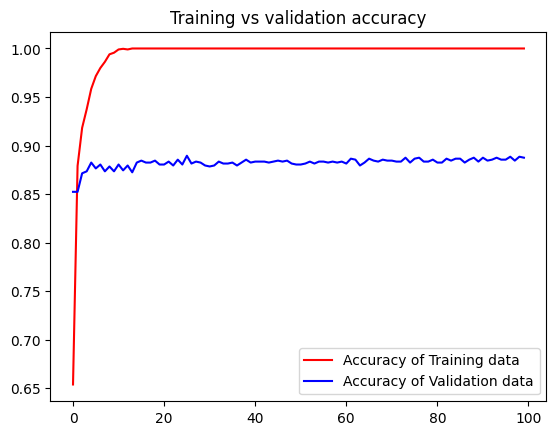

<Figure size 640x480 with 0 Axes>

In [22]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

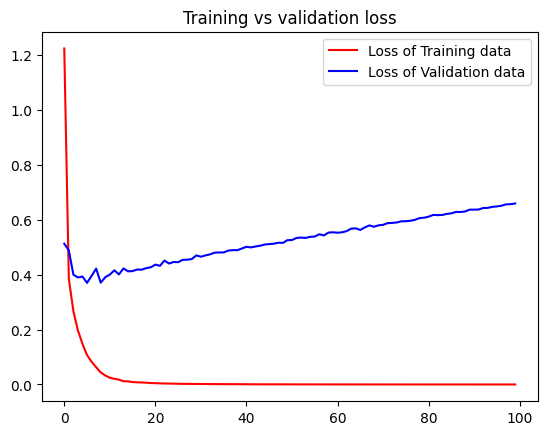

<Figure size 640x480 with 0 Axes>

In [23]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [25]:
image=load_img("/content/drive/MyDrive/狗狗品種data/datas/TEST/1006.jpg",target_size=(180,180))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [26]:
import cv2
from google.colab.patches import cv2_imshow

In [27]:
reverse_mapping={  0:'basset_hound', 1:'beagle',  2:'pomeranian', 
         3:'staffordshire_bull_terrier', 4:'keeshond',  5:'pug', 6:'shiba_inu', 
         7:'american_pit_bull_terrier', 8:'newfoundland', 
         9:'havanese', 10:'japanese_chin', 11:'german_shorthaired',
         12:'english_cocker_spaniel', 13:'scottish_terrier', 14:'wheaten_terrier', 15:'chihuahua', 
         16:'american_bulldog', 17:'boxer', 18:'yorkshire_terrier', 19:'miniature_pinscher', 
          20:'samoyed', 21:'leonberger', 22:'english_setter',
         23:'great_pyrenees', 24:'saint_bernard' } 

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 1s 936ms/step
Prediction is newfoundland.


In [28]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

pred2=[]
for item in prediction2:
    value2=np.argmax(item)      
    move_name2=mapper(value2)
    pred2+=[move_name2]

(1026, 180, 180, 3)
33/33 [==============================] - 3s 94ms/step
(1026, 25)


In [29]:
print(testfile[0:3])
print(pred2[0:3])
print(len(testfile))
print(len(pred2))

['1040.jpg', '1044.jpg', '1039.jpg']
['boxer', 'pomeranian', 'samoyed']
1026
1026


In [30]:
numbers=[]
for item in testfile:
    s=item[0:-4]
    numbers+=[int(s)]

In [31]:
result = pd.DataFrame(testfile)
result[1] = pred2
result[2] = numbers
result.columns = ['Filename','Class','Numbers']
print(result)

      Filename                       Class  Numbers
0     1040.jpg                       boxer     1040
1     1044.jpg                  pomeranian     1044
2     1039.jpg                     samoyed     1039
3     1038.jpg                    havanese     1038
4     1034.jpg                       boxer     1034
...        ...                         ...      ...
1021  1029.jpg                newfoundland     1029
1022  1042.jpg            scottish_terrier     1042
1023  1030.jpg                      beagle     1030
1024  1009.jpg                basset_hound     1009
1025  1035.jpg  staffordshire_bull_terrier     1035

[1026 rows x 3 columns]


In [32]:
result2=result.sort_values('Numbers').reset_index(drop=True)
result3=result2.drop('Numbers',axis=1)
print(result3)

      Filename                       Class
0        1.jpg                basset_hound
1        2.jpg                    keeshond
2        3.jpg                   chihuahua
3        6.jpg          german_shorthaired
4        7.jpg             wheaten_terrier
...        ...                         ...
1021  1493.jpg                  pomeranian
1022  1496.jpg          german_shorthaired
1023  1497.jpg  staffordshire_bull_terrier
1024  1499.jpg                       boxer
1025  1500.jpg               japanese_chin

[1026 rows x 2 columns]


In [33]:
sample=pd.read_csv('/content/drive/MyDrive/狗狗品種data/sample_submission.csv')
print(sample)

   Filename                       Class
0     1.jpg  staffordshire_bull_terrier
1     2.jpg                       boxer
2     3.jpg                  leonberger
3     4.jpg                  maine_coon
4     5.jpg                  abyssinian
5     6.jpg                     siamese
6     7.jpg          miniature_pinscher
7     8.jpg              great_pyrenees
8     9.jpg  staffordshire_bull_terrier
9    10.jpg                         pug
10   11.jpg                   shiba_inu
11   12.jpg                  pomeranian
12   13.jpg                      sphynx
13   14.jpg               saint_bernard
14   15.jpg               japanese_chin
15   16.jpg           british_shorthair
16   17.jpg                         pug
17   18.jpg   american_pit_bull_terrier
18   19.jpg                     samoyed
19   20.jpg                       boxer


##model save

In [34]:
model.save('dog.h5')

In [35]:
model_name = 'dog.h5'
save_dir = os.path.join(os.getcwd(), 'train_model')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('saved the trained model at %s ' % model_path)

saved the trained model at /content/train_model/dog.h5 


In [36]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

##Loading the LSTM save model

In [38]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/dog.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(testx, testy, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 88.74%
